Introduction
First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

The metric we'll use is called "`mutual information`". `Mutual information` is a lot like correlation in that it measures a relationship between two quantities. The advantage of `mutual information` is that it can detect any kind of relationship, while correlation only detects linear relationships.

Mutual information is a great general-purpose metric and especially useful at the start of feature development when you might not know what model you'd like to use yet. It is:

`easy to use and interpret,`
`computationally efficient,`
`theoretically well-founded,`
`resistant to overfitting, and,`
`able to detect any kind of relationship`

### MUTUAL INFORMATION

In [1]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Siapkan Data dalam Format Numerik**
X = np.array([
    [140, 3, 4, 7, 0],   # Rumah Tapak = 0, Apartemen = 1
    [160, 4, 3, 10, 1],
    [120, 2, 8, 15, 0],
    [180, 5, 2, 5, 0],
    [90, 1, 10, 20, 0],
    [175, 4, 3, 6, 1],
    [140, 3, 4, 7, 0]  # Duplikasi data
])

y = np.array([600, 750, 400, 1000, 300, 850, 600])  # Harga rumah

In [2]:
pd.DataFrame(X, columns=['Luas Tanah', 'Jumlah Kamar', 'Jarak ke Kota', 'Usia Bangunan', 'Jenis Properti'])

,Luas Tanah,Jumlah Kamar,Jarak ke Kota,Usia Bangunan,Jenis Properti
0,140,3,4,7,0
1,160,4,3,10,1
2,120,2,8,15,0
3,180,5,2,5,0
4,90,1,10,20,0
5,175,4,3,6,1
6,140,3,4,7,0


In [3]:
y

array([ 600,  750,  400, 1000,  300,  850,  600])

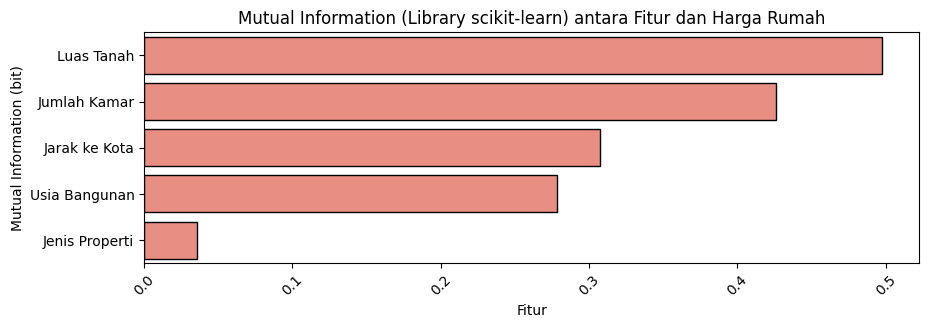

,Fitur,Mutual Information (sklearn)
0,Luas Tanah,0.497619
1,Jumlah Kamar,0.426190
2,Jarak ke Kota,0.307143
3,Usia Bangunan,0.278571
4,Jenis Properti,0.035714


In [4]:

# ** 2. Hitung Mutual Information Menggunakan scikit-learn**
mi_sklearn = mutual_info_regression(X, y, random_state=42)

# ** 4. Definisikan Nama Fitur dengan Benar**
features = ["Luas Tanah", "Jumlah Kamar", "Jarak ke Kota", "Usia Bangunan", "Jenis Properti"]

# ** 5. Visualisasi Hasil MI**
plt.figure(figsize=(10, 3))
sns.barplot(y=features, x=mi_sklearn, color='salmon', edgecolor='black', orient='h')
plt.xlabel("Fitur")
plt.ylabel("Mutual Information (bit)")
plt.title("Mutual Information (Library scikit-learn) antara Fitur dan Harga Rumah")
plt.xticks(rotation=45)
plt.show()

# ** 6. Tampilkan Hasil dalam Tabel**
df_mi_sklearn = pd.DataFrame({"Fitur": features, "Mutual Information (sklearn)": mi_sklearn})

# **Tampilkan DataFrame di Lokal atau Colab**
display(df_mi_sklearn)  # Gunakan ini jika di Jupyter Notebook
# print(df_mi_sklearn)  # Gunakan ini jika di terminal Python biasa

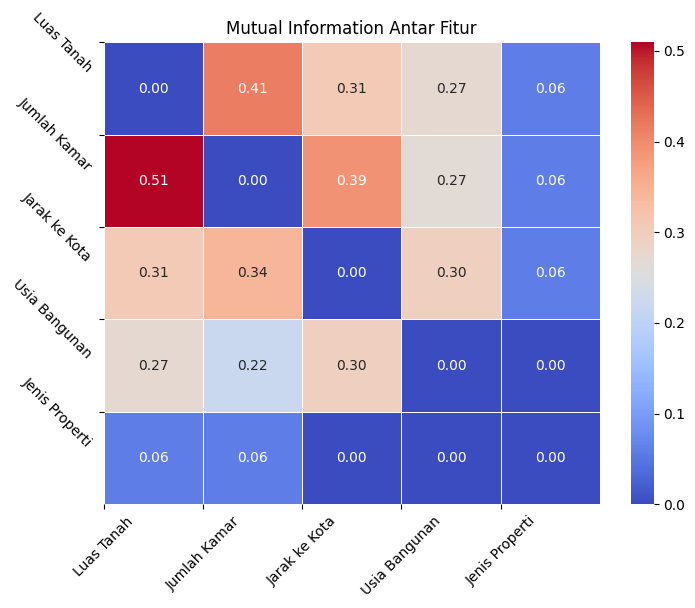

,Luas Tanah,Jumlah Kamar,Jarak ke Kota,Usia Bangunan,Jenis Properti
Luas Tanah,0.000000,0.414286,0.307143,0.271429,0.059524
Jumlah Kamar,0.509524,0.000000,0.390476,0.266667,0.059524
Jarak ke Kota,0.307143,0.342857,0.000000,0.295238,0.059524
Usia Bangunan,0.271429,0.219048,0.295238,0.000000,0.000000
Jenis Properti,0.059524,0.059524,0.000000,0.000000,0.000000


In [5]:
# ** 1. Hitung Mutual Information antar Fitur (Unsupervised MI)**
from sklearn.feature_selection import mutual_info_regression

# Kita hanya menggunakan fitur tanpa target
X_features = X.T  # Transpose agar setiap fitur dibandingkan satu sama lain

# Buat matriks MI antar fitur
num_features = X.shape[1]
mi_matrix = np.zeros((num_features, num_features))

# Hitung MI untuk setiap pasangan fitur
for i in range(num_features):
    for j in range(num_features):
        if i != j:  # Tidak perlu menghitung MI fitur dengan dirinya sendiri
            mi_matrix[i, j] = mutual_info_regression(X[:, [i]], X[:, j])[0]

# ** 2. Visualisasi Matriks Mutual Information antar Fitur**
plt.figure(figsize=(8, 6))
#plt.imshow(mi_matrix, cmap="coolwarm", interpolation="nearest")
sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(range(num_features), features, rotation=45)
plt.yticks(range(num_features), features, rotation=-45)
plt.title("Mutual Information Antar Fitur")
plt.show()

# ** 3. Tampilkan Data dalam Tabel**
df_mi_features = pd.DataFrame(mi_matrix, index=features, columns=features)
df_mi_features